# Brain Games PCA

In [2]:
%matplotlib inline
import numpy as np
import scipy.io
import sklearn
import scipy.cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [3]:
csvData = np.genfromtxt('EEG_recording_2019-09-21-21.12.43.csv', delimiter=',')
rawData = csvData[1:,1::]
raw34Data = csvData[1:,4:6]
raw4Data = csvData[1:,5:6]

In [4]:
assert rawData.shape[0]>0
assert rawData.shape[1]==5


In [5]:
def genTestTrainSet(data):
    n = data.shape[0]
    randIndex = np.random.choice(n, n//6, replace=False)
    test_set = data[randIndex]
    training_set = [data[i] for i in range(n) if i not in randIndex]
    return training_set, test_set

train, test = genTestTrainSet(rawData)
train34, test34 = genTestTrainSet(raw34Data)
train4, test4 = genTestTrainSet(raw4Data)

<Figure size 432x288 with 0 Axes>

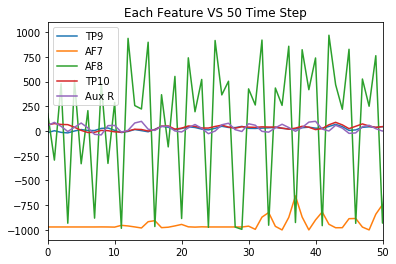

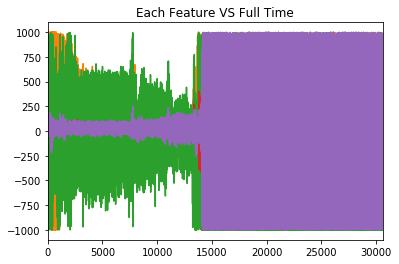

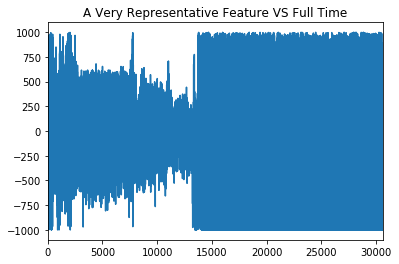

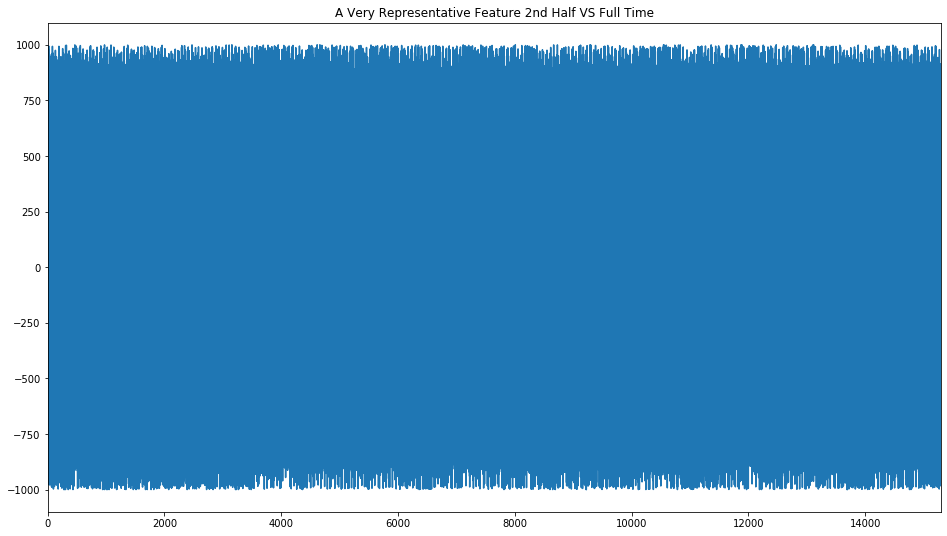

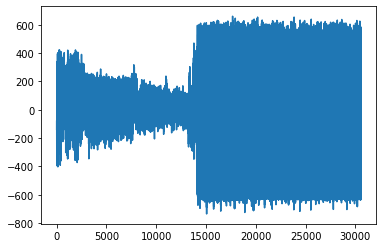

<Figure size 432x288 with 0 Axes>

In [6]:
features = {0:"TP9", 1:"AF7", 2:"AF8", 3:"TP10", 4:"Aux R"}
for feature in range(0,5):
    #print(features[feature])
    plt.plot(rawData[:,feature], label = features[feature])
    plt.xlim((0,50))
    plt.title('Each Feature VS 50 Time Step')
plt.legend()
plt.figure()
for feature in range(0,5):
    plt.plot(rawData[:,feature])
    plt.xlim((0,rawData.shape[0]))
    plt.title('Each Feature VS Full Time')
plt.figure()

plt.plot(rawData[:,2])
plt.xlim((0,rawData.shape[0]))
plt.title('A Very Representative Feature VS Full Time')
plt.figure(figsize = (16,9))

plt.plot(rawData[rawData.shape[0]//2:,4])
plt.xlim((0,rawData.shape[0]//2))
plt.title('A Very Representative Feature 2nd Half VS Full Time')
plt.figure()
#The graph is not that helpful because data value VS feature simply shows us what does each data point looks like
#We care more about how the data evolve through time, not through feature
"""
for data in rawData[:1000]:
    plt.plot(data)
    plt.xlim((1,4))
    plt.title('Data Value VS Each Feature')
plt.figure()
plt.title('Average Data Value VS Full Time')"""
#This shows the average of each datapoint (5 parameters)
plt.plot(np.mean(rawData,axis = 1))
plt.figure()


In [7]:
def PCA_train(trainingSet, n):
    #first standarize the data so it is symmetric about its mean
    #uTXTXu --> uTUS^2UTu --> vTS^2v (v is still a unit vector and S^2=EigenDecomposition middle matrix for XTX)
    #Principal Components are the eigenvectors of XTX, which forms a basis together, that's why we can simply do SVD, return V
    mean = np.mean(trainingSet, axis=0) 
    sigma = np.std(trainingSet, axis=0)
    
    trainingSet = trainingSet - mean
    trainingSet = trainingSet/sigma
    U, S, V = np.linalg.svd(trainingSet)
    n_components = V[:n]     
    
    return n_components, mean, sigma
def PCA_project(data, new_basis, mean, sigma):
    #To see the data's repr in the basis of principal components
    return np.dot((data-mean)/sigma, new_basis.T)
    #print(data.shape)
    #print(new_basis.shape)
    #return np.dot(new_basis.T,(data-mean)/sigma)

def PCA(trainingSet):
    pca = PCA()
    X_pca = pca.fit_transform(trainingSet)
    return X_pca
def KPCA(trainingSet):
    kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
    X_kpca = kpca.fit_transform(trainingSet)
    return X_kpca
    


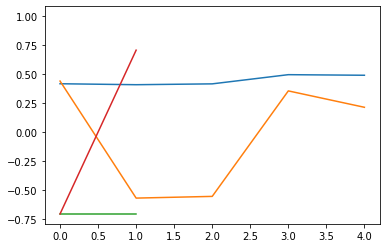

In [12]:
pc2, mu2, s2 = PCA_train(train, 2)
pc234, mu234, s234 = PCA_train(train34, 2)
pc4, mu4, s4 = PCA_train(train4, 1)
for comp in pc2:
    plt.plot(comp)
for comp in pc234:
    plt.plot(comp)   
for comp in pc4:
    plt.plot(comp)
#X_kpca = KPCA(train)
#print(X_kpca.shape)

'\nplt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",\n            s=20, edgecolor=\'k\')\nplt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",\n            s=20, edgecolor=\'k\')\nplt.title("Projection by KPCA")\nplt.xlabel(r"1st principal component in space induced by $\\phi$")\nplt.ylabel("2nd component")\nplt.figure()'

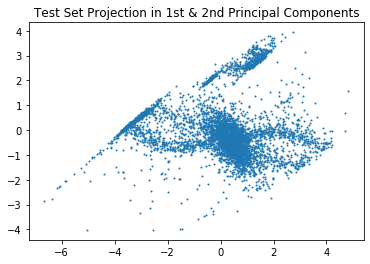

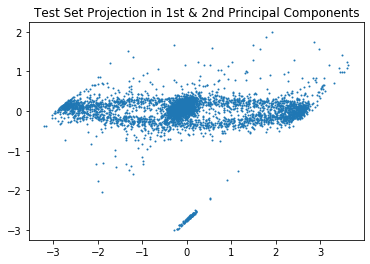

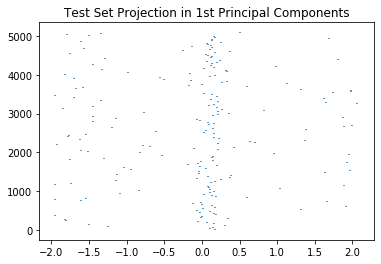

<Figure size 432x288 with 0 Axes>

In [15]:
proj2 = PCA_project(test, pc2, mu2, s2)
plt.scatter(*proj2.T,s=1)
plt.title('Test Set Projection in 1st & 2nd Principal Components')
plt.figure()

proj234 = PCA_project(test34, pc234, mu234, s234)
plt.scatter(*proj234.T,s=1)
plt.title('Test Set Projection in 1st & 2nd Principal Components')
plt.figure()


proj14 = PCA_project(test4, pc4, mu4, s4)
#plt.scatter(*proj14.T,s=1)
proj14 = list(proj14)
plt.eventplot(proj14)
plt.title('Test Set Projection in 1st Principal Components')
plt.figure()
"""
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.figure()"""